# Prediction of Parkinson Disease 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from sklearn.preprocessing import MinMaxScaler

def getNormalizedData(X):
   
    # fit scaler on training data
    norm = MinMaxScaler().fit(X)

    # transform training data
    X_norm = norm.transform(X)
    X_norm = pd.DataFrame(X_norm, columns=X.columns.values)

    X_norm;
    return X_norm;

import warnings
warnings.filterwarnings('ignore')

# Importing Data 

In [4]:
parkinsons = pd.read_csv('parkinsons.csv')

In [5]:
parkinsons.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

# Data Cleaning

#### Checking for Null value and duplicacy

<AxesSubplot:>

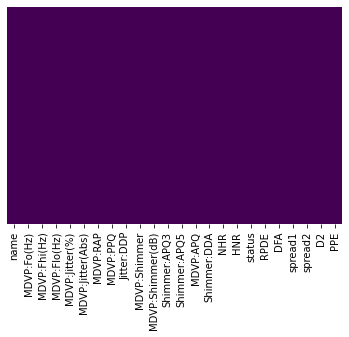

In [6]:
sns.heatmap(parkinsons.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
print('No of duplicates in Dataset : {}'.format(sum(parkinsons.duplicated())))

No of duplicates in Dataset : 0


In [8]:
print('We have {} NaN/Null values in Dataset'.format(parkinsons.isnull().values.sum()))

We have 0 NaN/Null values in Dataset


#### Feature Selection

In [9]:
parkinsons.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [10]:
parkinsons_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
X=parkinsons[parkinsons_features]
X.describe

<bound method NDFrame.describe of      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394  

In [11]:
y=parkinsons.status
y.describe

<bound method NDFrame.describe of 0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64>

In [12]:
X.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...    MDVP:APQ  Shimmer:DDA         NHR         HNR  \
count        195.000000  ...  195.000000   195.000000  195.000000  195.000000   
mean           0.282251  ...    0.024081     0.046993    0.024847   21.885974   
std            0.194877  ...    0.016947     0.030459    0.040418    4.425764   
min            0.085000  ...    0.007190     0.013640    0.000650    8.441000   
25%            0.148500  ...    0.013080     0.024735    0.005925   19.198000   
50%            0.221000  ...    0.018260     0.038360    0.011660   22.085000   
75%            0.350000  ...    0.029400     0.060795    0.025640   25.075500   
max            1.302000  ...    0.137780     0.169420    0.314820   33.047000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 22 columns]

In [13]:
X=getNormalizedData(X);
X.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean      0.383623      0.193841      0.292748        0.144233   
std       0.240959      0.186761      0.250564        0.154007   
min       0.000000      0.000000      0.000000        0.000000   
25%       0.170220      0.066786      0.108323        0.056544   
50%       0.351961      0.150411      0.223606        0.103558   
75%       0.549775      0.249162      0.429160        0.180591   
max       1.000000      1.000000      1.000000        1.000000   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.146083    0.126513    0.135389    0.126504      0.184126   
std            0.137636    0.142956    0.147855    0.142934      0.172147   
min            0.000000    0.000000    0.000000    0.000000      0.000000   
25%            0.051383    0.047206    0.050375    0.047279      0.063584   
50%            0.090909    0.087669    0.094855    0.087494      0.122604   
75%            0.209486    0.151975    0.162647    0.151951      0.258764   
max            1.000000    1.000000    1.000000    1.000000      1.000000   

       MDVP:Shimmer(dB)  ...    MDVP:APQ  Shimmer:DDA         NHR         HNR  \
count        195.000000  ...  195.000000   195.000000  195.000000  195.000000   
mean           0.162080  ...    0.129347     0.214101    0.077019    0.546410   
std            0.160129  ...    0.129771     0.195527    0.128652    0.179865   
min            0.000000  ...    0.000000     0.000000    0.000000    0.000000   
25%            0.052177  ...    0.045103     0.071222    0.016790    0.437170   
50%            0.111750  ...    0.084769     0.158685    0.035045    0.554499   
75%            0.217749  ...    0.170074     0.302703    0.079543    0.676034   
max            1.000000  ...    1.000000     1.000000    1.000000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.564574    0.572963    0.412332    0.495783    0.426421    0.335549  
std      0.242525    0.220456    0.197110    0.187758    0.170294    0.186649  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.384375    0.400291    0.273893    0.378364    0.300658    0.192433  
50%      0.558550    0.589516    0.405738    0.478618    0.417393    0.309661  
75%      0.772299    0.747391    0.527720    0.614472    0.539698    0.431709  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 22 columns]

#### Splitting Data into Train, Test and Validation Data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [15]:
print(X_train.shape, X_test.shape, X_val.shape)

(124, 22) (39, 22) (32, 22)


In [16]:
X_train.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
77      0.129445      0.047458      0.238034        0.093393   
110     0.654245      0.248705      0.139383        0.143901   
146     0.474123      0.182929      0.494980        0.444727   
70      0.316676      0.123015      0.000000        0.210610   
22      0.463388      0.185913      0.078253        0.087039   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
77           0.130435  0.076108  0.100750    0.075935      0.113657   
110          0.090909  0.145954  0.131297    0.145770      0.121599   
146          0.328063  0.382948  0.457663    0.382886      0.656290   
70           0.209486  0.193160  0.175241    0.193129      0.231057   
22           0.090909  0.073218  0.083065    0.073367      0.310115   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
77           0.092030  ...  0.070220     0.159712  0.011300  0.706291   
110          0.100247  ...  0.086760     0.141995  0.020339  0.601398   
146          0.604766  ...  0.619420     0.644948  0.237610  0.159229   
70           0.230074  ...  0.170763     0.272243  0.080657  0.480493   
22           0.239934  ...  0.270082     0.341571  0.038673  0.570064   

         RPDE       DFA   spread1   spread2        D2       PPE  
77   0.403457  0.964351  0.465373  0.549949  0.157756  0.389797  
110  0.418857  0.611862  0.489367  0.563191  0.501664  0.389333  
146  0.711744  0.873393  0.843854  0.919555  0.885444  0.855365  
70   0.543130  0.621917  0.405738  0.343425  0.380200  0.282272  
22   0.845791  0.420516  0.657035  0.576540  0.664403  0.499466  

[5 rows x 22 columns]

In [17]:
y_train.head()

77     1
110    1
146    1
70     1
22     1
Name: status, dtype: int64

In [18]:
X_train.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   124.000000    124.000000    124.000000      124.000000   
mean      0.387764      0.182585      0.299736        0.136933   
std       0.240617      0.170575      0.244795        0.144416   
min       0.000000      0.000000      0.000000        0.001906   
25%       0.178300      0.060648      0.117019        0.052335   
50%       0.357570      0.144468      0.234375        0.097840   
75%       0.554926      0.235618      0.426199        0.175429   
max       0.955464      0.988848      0.961501        0.933609   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        124.000000  124.000000  124.000000  124.000000    124.000000   
mean           0.136906    0.118054    0.131241    0.118039      0.185685   
std            0.121487    0.131276    0.146701    0.131248      0.175270   
min            0.000000    0.003372    0.002144    0.003371      0.000000   
25%            0.051383    0.045400    0.048232    0.045272      0.062215   
50%            0.090909    0.080443    0.092176    0.080430      0.122375   
75%            0.179842    0.146074    0.159700    0.145930      0.258741   
max            0.841897    0.860308    1.000000    0.860331      1.000000   

       MDVP:Shimmer(dB)  ...    MDVP:APQ  Shimmer:DDA         NHR         HNR  \
count        124.000000  ...  124.000000   124.000000  124.000000  124.000000   
mean           0.163908  ...    0.132349     0.214574    0.071823    0.550532   
std            0.164769  ...    0.138747     0.195376    0.112563    0.181685   
min            0.000000  ...    0.000000     0.000000    0.000000    0.000000   
25%            0.048891  ...    0.041983     0.073581    0.013456    0.434467   
50%            0.111750  ...    0.085956     0.159167    0.035252    0.572807   
75%            0.219392  ...    0.181465     0.303232    0.081628    0.683329   
max            1.000000  ...    1.000000     1.000000    0.823280    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  124.000000  124.000000  124.000000  124.000000  124.000000  124.000000  
mean     0.563564    0.580397    0.412094    0.495985    0.415668    0.335958  
std      0.247846    0.222802    0.193513    0.188154    0.175921    0.185482  
min      0.000000    0.033577    0.000000    0.000000    0.000000    0.000000  
25%      0.381195    0.405461    0.278804    0.384874    0.284197    0.207005  
50%      0.541276    0.597093    0.405449    0.477663    0.401158    0.312232  
75%      0.794202    0.751985    0.509280    0.593819    0.538789    0.421449  
max      1.000000    1.000000    1.000000    1.000000    0.885444    1.000000  

[8 rows x 22 columns]

In [19]:
X_train=getNormalizedData(X_train);
X_train.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   124.000000    124.000000    124.000000      124.000000   
mean      0.405838      0.184644      0.311737        0.144925   
std       0.251833      0.172499      0.254596        0.155002   
min       0.000000      0.000000      0.000000        0.000000   
25%       0.186611      0.061332      0.121704        0.054125   
50%       0.374237      0.146097      0.243759        0.102966   
75%       0.580792      0.238275      0.443264        0.186243   
max       1.000000      1.000000      1.000000        1.000000   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        124.000000  124.000000  124.000000  124.000000    124.000000   
mean           0.162615    0.133828    0.129374    0.133808      0.185685   
std            0.144302    0.153192    0.147016    0.153155      0.175270   
min            0.000000    0.000000    0.000000    0.000000      0.000000   
25%            0.061033    0.049044    0.046187    0.048895      0.062215   
50%            0.107981    0.089938    0.090226    0.089921      0.122375   
75%            0.213615    0.166526    0.157895    0.166354      0.258741   
max            1.000000    1.000000    1.000000    1.000000      1.000000   

       MDVP:Shimmer(dB)  ...    MDVP:APQ  Shimmer:DDA         NHR         HNR  \
count        124.000000  ...  124.000000   124.000000  124.000000  124.000000   
mean           0.163908  ...    0.132349     0.214574    0.087241    0.550532   
std            0.164769  ...    0.138747     0.195376    0.136725    0.181685   
min            0.000000  ...    0.000000     0.000000    0.000000    0.000000   
25%            0.048891  ...    0.041983     0.073581    0.016344    0.434467   
50%            0.111750  ...    0.085956     0.159167    0.042818    0.572807   
75%            0.219392  ...    0.181465     0.303232    0.099149    0.683329   
max            1.000000  ...    1.000000     1.000000    1.000000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  124.000000  124.000000  124.000000  124.000000  124.000000  124.000000  
mean     0.563564    0.565818    0.412094    0.495985    0.469446    0.335958  
std      0.247846    0.230543    0.193513    0.188154    0.198681    0.185482  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.381195    0.384805    0.278804    0.384874    0.320965    0.207005  
50%      0.541276    0.583095    0.405449    0.477663    0.453058    0.312232  
75%      0.794202    0.743368    0.509280    0.593819    0.608496    0.421449  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 22 columns]

In [20]:
X_test=getNormalizedData(X_test);
X_test.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count    39.000000     39.000000     39.000000       39.000000   
mean      0.364148      0.208327      0.277836        0.207253   
std       0.256436      0.213075      0.287401        0.192228   
min       0.000000      0.000000      0.000000        0.000000   
25%       0.145427      0.063936      0.091796        0.083142   
50%       0.336252      0.143830      0.163179        0.151899   
75%       0.509316      0.256487      0.330654        0.314442   
max       1.000000      1.000000      1.000000        1.000000   

       MDVP:Jitter(Abs)   MDVP:RAP   MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count         39.000000  39.000000  39.000000   39.000000     39.000000   
mean           0.230587   0.177638   0.219575    0.177971      0.281110   
std            0.207639   0.190066   0.220771    0.190018      0.267060   
min            0.000000   0.000000   0.000000    0.000000      0.000000   
25%            0.078014   0.054080   0.074286    0.054396      0.076762   
50%            0.148936   0.108159   0.140571    0.108792      0.178003   
75%            0.290780   0.250000   0.320571    0.250474      0.380399   
max            1.000000   1.000000   1.000000    1.000000      1.000000   

       MDVP:Shimmer(dB)  ...   MDVP:APQ  Shimmer:DDA        NHR        HNR  \
count         39.000000  ...  39.000000    39.000000  39.000000  39.000000   
mean           0.273864  ...   0.267824     0.283394   0.100059   0.526880   
std            0.254578  ...   0.248694     0.275481   0.161472   0.205564   
min            0.000000  ...   0.000000     0.000000   0.000000   0.000000   
25%            0.082456  ...   0.095997     0.074624   0.032723   0.400969   
50%            0.189474  ...   0.200159     0.205579   0.060690   0.481059   
75%            0.373684  ...   0.355109     0.416577   0.101391   0.663756   
max            1.000000  ...   1.000000     1.000000   1.000000   1.000000   

            RPDE        DFA    spread1    spread2         D2        PPE  
count  39.000000  39.000000  39.000000  39.000000  39.000000  39.000000  
mean    0.520349   0.566401   0.412587   0.428951   0.418228   0.403507  
std     0.248738   0.231384   0.241879   0.268598   0.245462   0.267357  
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
25%     0.369782   0.380980   0.234336   0.247274   0.244957   0.194360  
50%     0.508743   0.594193   0.363177   0.394144   0.401354   0.331190  
75%     0.691635   0.711339   0.574721   0.568584   0.562414   0.573909  
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000  

[8 rows x 22 columns]

In [21]:
X_val=getNormalizedData(X_val);
X_val.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count    32.000000     32.000000     32.000000       32.000000   
mean      0.397438      0.196972      0.315138        0.197238   
std       0.280239      0.227267      0.261990        0.219638   
min       0.000000      0.000000      0.000000        0.000000   
25%       0.150339      0.077759      0.131423        0.089263   
50%       0.365944      0.136542      0.213966        0.116105   
75%       0.647191      0.240303      0.499862        0.195839   
max       1.000000      1.000000      1.000000        1.000000   

       MDVP:Jitter(Abs)   MDVP:RAP   MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count         32.000000  32.000000  32.000000   32.000000     32.000000   
mean           0.183750   0.181840   0.204321    0.181856      0.279166   
std            0.204431   0.210297   0.220331    0.210284      0.260907   
min            0.000000   0.000000   0.000000    0.000000      0.000000   
25%            0.080000   0.074783   0.093497    0.074771      0.083405   
50%            0.120000   0.108622   0.143746    0.108765      0.199470   
75%            0.200000   0.176060   0.208307    0.176192      0.385322   
max            1.000000   1.000000   1.000000    1.000000      1.000000   

       MDVP:Shimmer(dB)  ...   MDVP:APQ  Shimmer:DDA        NHR        HNR  \
count         32.000000  ...  32.000000    32.000000  32.000000  32.000000   
mean           0.240941  ...   0.229444     0.259735   0.119125   0.562916   
std            0.240758  ...   0.229121     0.243064   0.204563   0.222865   
min            0.000000  ...   0.000000     0.000000   0.000000   0.000000   
25%            0.062704  ...   0.072497     0.085131   0.020089   0.467575   
50%            0.171553  ...   0.147767     0.191390   0.032017   0.613344   
75%            0.295060  ...   0.300947     0.371510   0.115388   0.712905   
max            1.000000  ...   1.000000     1.000000   1.000000   1.000000   

            RPDE        DFA    spread1    spread2         D2        PPE  
count  32.000000  32.000000  32.000000  32.000000  32.000000  32.000000  
mean    0.520820   0.507135   0.370369   0.537016   0.364139   0.319262  
std     0.323002   0.300153   0.251050   0.278431   0.216369   0.252638  
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
25%     0.217169   0.232938   0.173974   0.354104   0.260869   0.098749  
50%     0.521777   0.510755   0.342727   0.601685   0.338131   0.271373  
75%     0.798332   0.745768   0.488265   0.768386   0.472177   0.436955  
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000  

[8 rows x 22 columns]

# Data Exploration

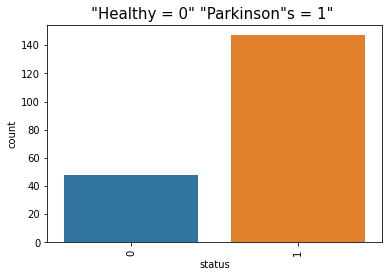

In [22]:
plt.title('"Healthy = 0" "Parkinson"s = 1" ', fontsize=15)
sns.countplot(parkinsons.status)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='PPE'>

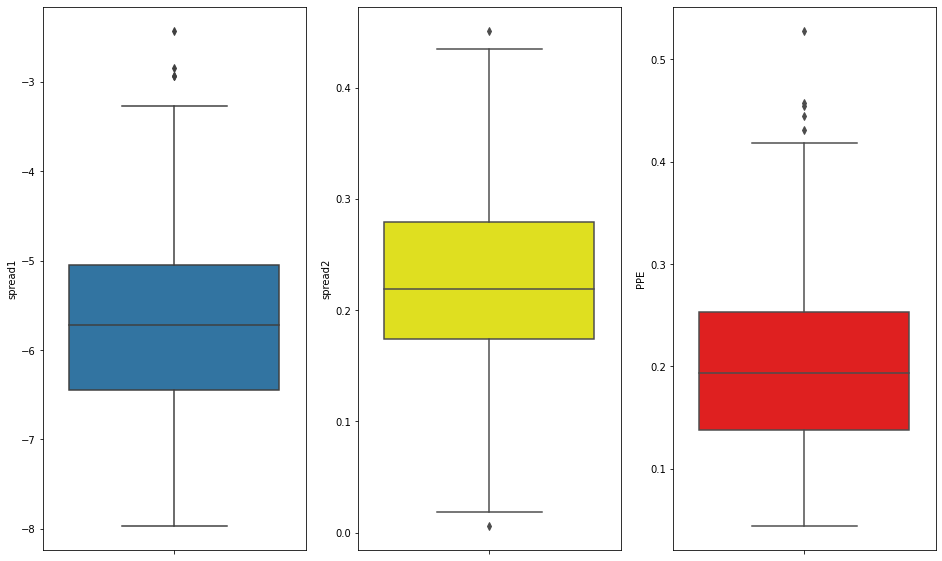

In [23]:
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(y='spread1',data=parkinsons, ax=ax[0],orient='v') 
sns.boxplot(y='spread2',data=parkinsons, ax=ax[1],orient='v',color='yellow')
sns.boxplot(y='PPE',data=parkinsons,ax=ax[2],orient='v',color='red')

<AxesSubplot:xlabel='MDVP:Fhi(Hz)', ylabel='Density'>

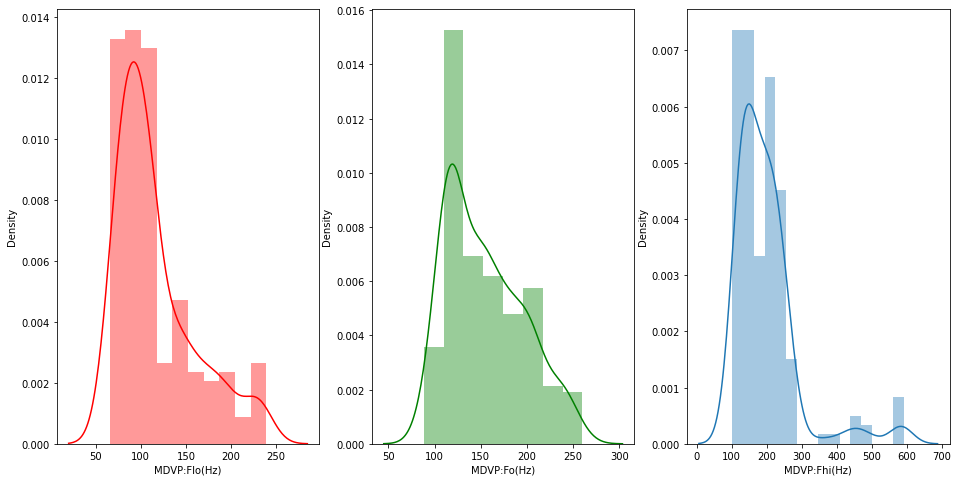

In [24]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(parkinsons['MDVP:Flo(Hz)'],ax=ax[0], color='red') 
sns.distplot(parkinsons['MDVP:Fo(Hz)'],ax=ax[1], color='green') 
sns.distplot(parkinsons['MDVP:Fhi(Hz)'],ax=ax[2])

<AxesSubplot:xlabel='HNR', ylabel='Density'>

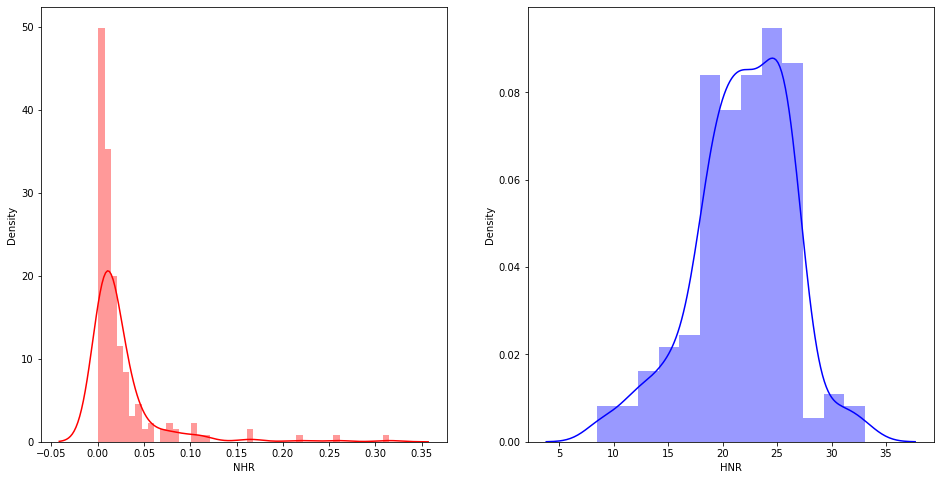

In [25]:
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(parkinsons['NHR'],ax=ax[0], color='red') 
sns.distplot(parkinsons['HNR'],ax=ax[1], color='blue')

<AxesSubplot:xlabel='Shimmer:DDA', ylabel='Density'>

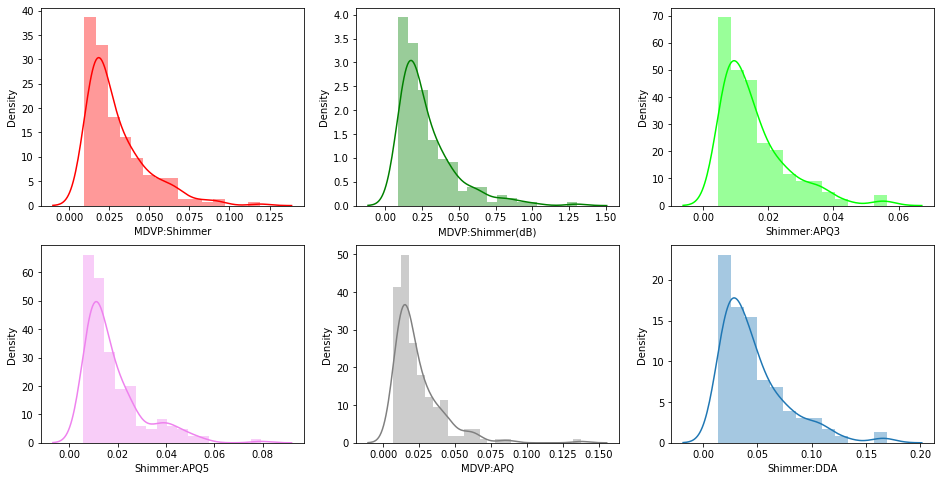

In [26]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(parkinsons['MDVP:Shimmer'],ax=ax[0,0], color='red') 
sns.distplot(parkinsons['MDVP:Shimmer(dB)'],ax=ax[0,1],color='green') 
sns.distplot(parkinsons['Shimmer:APQ3'],ax=ax[0,2],color='lime') 
sns.distplot(parkinsons['Shimmer:APQ5'],ax=ax[1,0], color='violet') 
sns.distplot(parkinsons['MDVP:APQ'],ax=ax[1,1], color='grey') 
sns.distplot(parkinsons['Shimmer:DDA'],ax=ax[1,2])

<AxesSubplot:xlabel='spread1', ylabel='Density'>

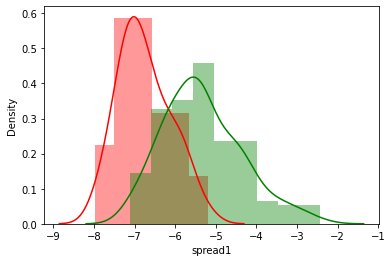

In [29]:
sns.distplot( parkinsons[parkinsons.status == 0]['spread1'], color = 'r')
sns.distplot( parkinsons[parkinsons.status == 1]['spread1'], color = 'g')

<AxesSubplot:xlabel='status', ylabel='HNR'>

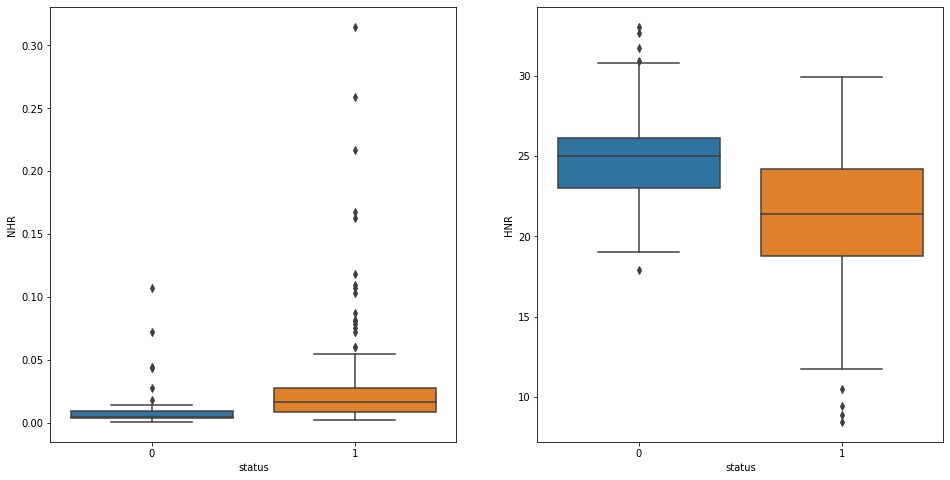

In [27]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='NHR',data=parkinsons,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=parkinsons,ax=ax[1])

<AxesSubplot:xlabel='status', ylabel='MDVP:Fhi(Hz)'>

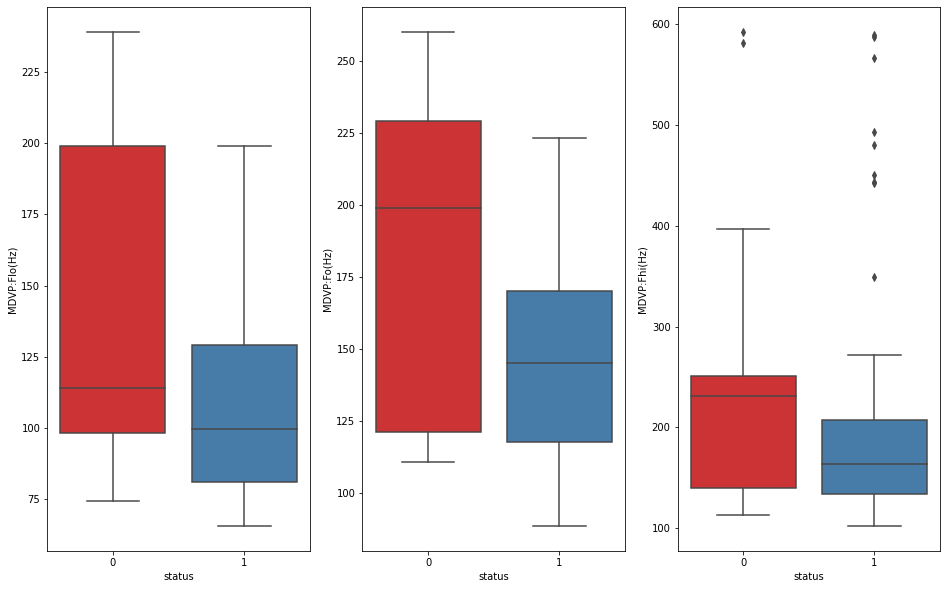

In [28]:
fig, ax = plt.subplots(1,3,figsize=(16,10))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=parkinsons,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=parkinsons,palette="Set1",ax=ax[1])
sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=parkinsons,palette="Set1",ax=ax[2])

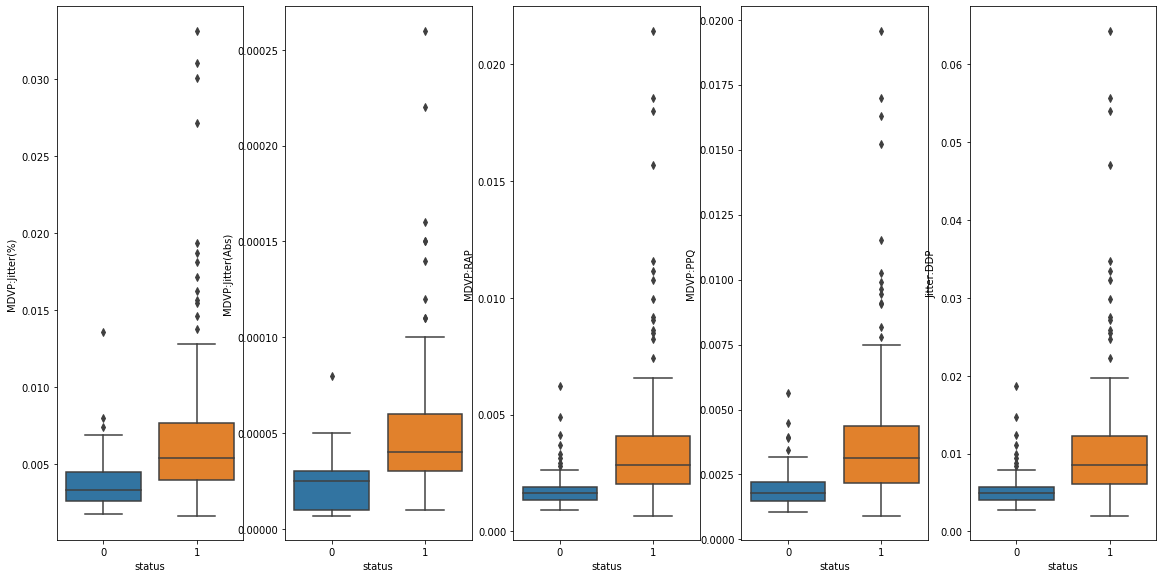

In [29]:
# For categorical predictors
cols = ["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=parkinsons, ax = axs[i])

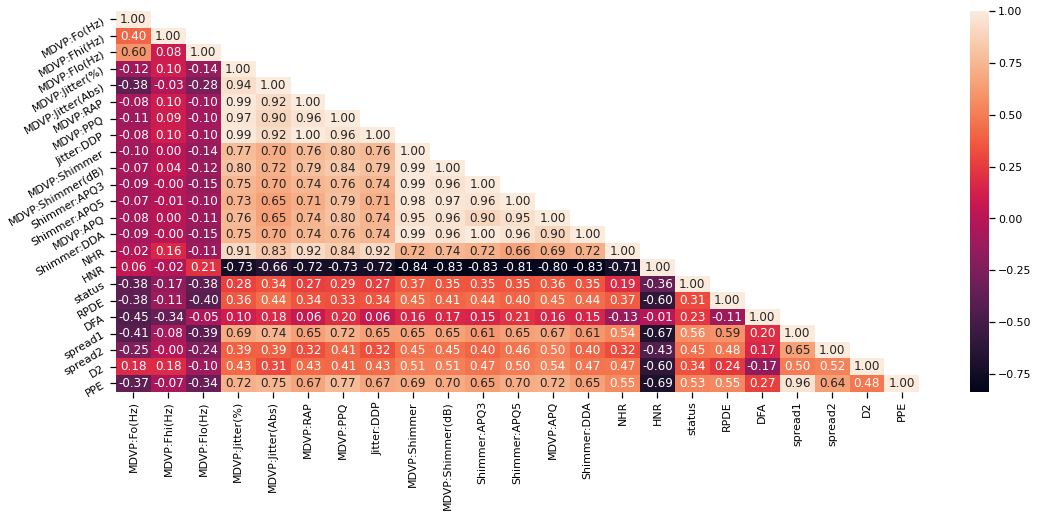

In [30]:
corr = parkinsons.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#### Apply T-sne on data

In [31]:
 from sklearn.manifold import TSNE

In [32]:
def perform_tsne(X, y, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
       
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X)
        print('Done..')
                 
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y})
    
        markers = [1,0]
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=markers)
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


In [33]:
parkinsons.tail()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[5 rows x 24 columns]

In [34]:
y1_train=y_train.astype({"status": str})

In [35]:
X_train.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   124.000000    124.000000    124.000000      124.000000   
mean      0.405838      0.184644      0.311737        0.144925   
std       0.251833      0.172499      0.254596        0.155002   
min       0.000000      0.000000      0.000000        0.000000   
25%       0.186611      0.061332      0.121704        0.054125   
50%       0.374237      0.146097      0.243759        0.102966   
75%       0.580792      0.238275      0.443264        0.186243   
max       1.000000      1.000000      1.000000        1.000000   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        124.000000  124.000000  124.000000  124.000000    124.000000   
mean           0.162615    0.133828    0.129374    0.133808      0.185685   
std            0.144302    0.153192    0.147016    0.153155      0.175270   
min            0.000000    0.000000    0.000000    0.000000      0.000000   
25%            0.061033    0.049044    0.046187    0.048895      0.062215   
50%            0.107981    0.089938    0.090226    0.089921      0.122375   
75%            0.213615    0.166526    0.157895    0.166354      0.258741   
max            1.000000    1.000000    1.000000    1.000000      1.000000   

       MDVP:Shimmer(dB)  ...    MDVP:APQ  Shimmer:DDA         NHR         HNR  \
count        124.000000  ...  124.000000   124.000000  124.000000  124.000000   
mean           0.163908  ...    0.132349     0.214574    0.087241    0.550532   
std            0.164769  ...    0.138747     0.195376    0.136725    0.181685   
min            0.000000  ...    0.000000     0.000000    0.000000    0.000000   
25%            0.048891  ...    0.041983     0.073581    0.016344    0.434467   
50%            0.111750  ...    0.085956     0.159167    0.042818    0.572807   
75%            0.219392  ...    0.181465     0.303232    0.099149    0.683329   
max            1.000000  ...    1.000000     1.000000    1.000000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  124.000000  124.000000  124.000000  124.000000  124.000000  124.000000  
mean     0.563564    0.565818    0.412094    0.495985    0.469446    0.335958  
std      0.247846    0.230543    0.193513    0.188154    0.198681    0.185482  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.381195    0.384805    0.278804    0.384874    0.320965    0.207005  
50%      0.541276    0.583095    0.405449    0.477663    0.453058    0.312232  
75%      0.794202    0.743368    0.509280    0.593819    0.608496    0.421449  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 22 columns]

In [36]:
X_pre_tsne = X_train
y_pre_tsne = y1_train


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 124 samples in 0.000s...
[t-SNE] Computed neighbors for 124 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 124 / 124
[t-SNE] Mean sigma: 0.110817
[t-SNE] Computed conditional probabilities in 0.024s
[t-SNE] Iteration 50: error = 88.3590393, gradient norm = 0.3370831 (50 iterations in 0.031s)
[t-SNE] Iteration 100: error = 85.0533142, gradient norm = 0.2761929 (50 iterations in 0.032s)
[t-SNE] Iteration 150: error = 80.1140289, gradient norm = 0.3067152 (50 iterations in 0.033s)
[t-SNE] Iteration 200: error = 76.7208176, gradient norm = 0.4028424 (50 iterations in 0.036s)
[t-SNE] Iteration 250: error = 76.1675644, gradient norm = 0.3900897 (50 iterations in 0.033s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.167564
[t-SNE] Iteration 300: error = 3.5508831, gradient norm = 0.0243671 (50 iterations in 0.034s)
[t-

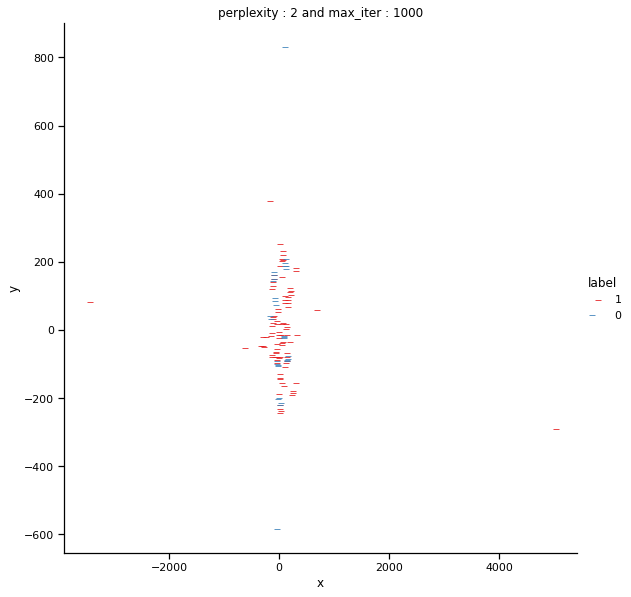

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 124 samples in 0.000s...
[t-SNE] Computed neighbors for 124 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 124 / 124
[t-SNE] Mean sigma: 0.220279
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 74.8124466, gradient norm = 0.4126072 (50 iterations in 0.032s)
[t-SNE] Iteration 100: error = 71.3920975, gradient norm = 0.4004484 (50 iterations in 0.039s)
[t-SNE] Iteration 150: error = 68.7473984, gradient norm = 0.4250488 (50 iterations in 0.041s)
[t-SNE] Iteration 200: error = 69.8938293, gradient norm = 0.4211245 (50 iterations in 0.042s)
[t-SNE] Iteration 250: error = 69.4966431, gradient norm = 0.4391871 (50 iterations in 0.047s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.496643
[t-SNE] Iteration 300: error = 1.1451733, gradient norm = 0.0291099 (50 iterations in 0.038

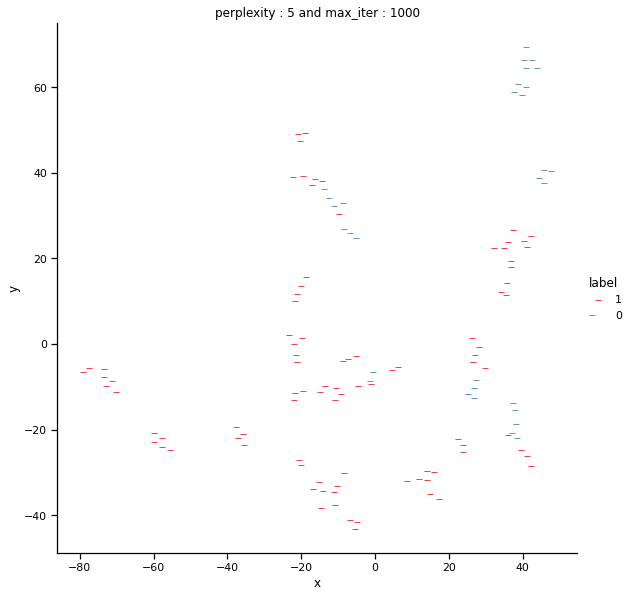

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 124 samples in 0.000s...
[t-SNE] Computed neighbors for 124 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 124 / 124
[t-SNE] Mean sigma: 0.282874
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 65.3608398, gradient norm = 0.5149696 (50 iterations in 0.037s)
[t-SNE] Iteration 100: error = 66.5138855, gradient norm = 0.4654909 (50 iterations in 0.041s)
[t-SNE] Iteration 150: error = 67.3674927, gradient norm = 0.4609373 (50 iterations in 0.041s)
[t-SNE] Iteration 200: error = 64.5594864, gradient norm = 0.5533391 (50 iterations in 0.039s)
[t-SNE] Iteration 250: error = 69.1232758, gradient norm = 0.4254509 (50 iterations in 0.045s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.123276
[t-SNE] Iteration 300: error = 0.9851744, gradient norm = 0.0178116 (50 iterations in 0.03

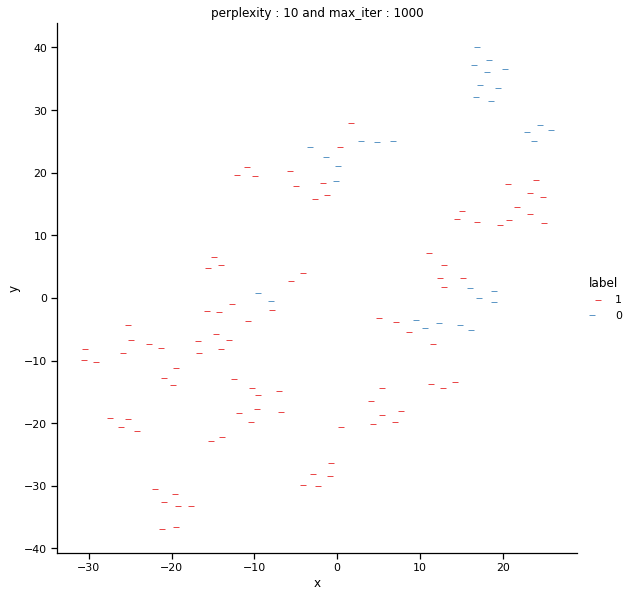

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 124 samples in 0.000s...
[t-SNE] Computed neighbors for 124 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 124 / 124
[t-SNE] Mean sigma: 0.354180
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 62.5335121, gradient norm = 0.4960557 (50 iterations in 0.034s)
[t-SNE] Iteration 100: error = 61.1070023, gradient norm = 0.5477784 (50 iterations in 0.036s)
[t-SNE] Iteration 150: error = 62.1298790, gradient norm = 0.5305417 (50 iterations in 0.038s)
[t-SNE] Iteration 200: error = 61.8487473, gradient norm = 0.4531677 (50 iterations in 0.039s)
[t-SNE] Iteration 250: error = 60.2739792, gradient norm = 0.5166312 (50 iterations in 0.039s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.273979
[t-SNE] Iteration 300: error = 0.5176304, gradient norm = 0.0069605 (50 iterations in 0.03

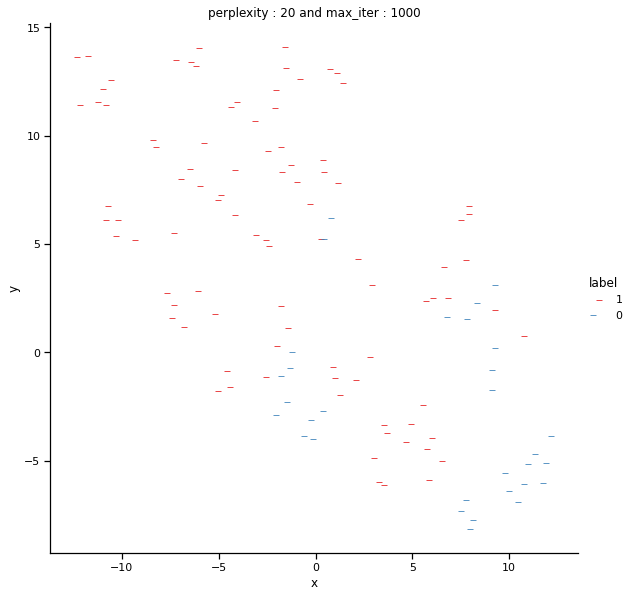

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 123 nearest neighbors...
[t-SNE] Indexed 124 samples in 0.000s...
[t-SNE] Computed neighbors for 124 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 124 / 124
[t-SNE] Mean sigma: 0.508255
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 51.5685120, gradient norm = 0.5294500 (50 iterations in 0.039s)
[t-SNE] Iteration 100: error = 53.4577789, gradient norm = 0.5471928 (50 iterations in 0.049s)
[t-SNE] Iteration 150: error = 52.9753342, gradient norm = 0.4859241 (50 iterations in 0.046s)
[t-SNE] Iteration 200: error = 48.7977066, gradient norm = 0.5976090 (50 iterations in 0.045s)
[t-SNE] Iteration 250: error = 49.8578491, gradient norm = 0.5418629 (50 iterations in 0.041s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.857849
[t-SNE] Iteration 300: error = 0.2576931, gradient norm = 0.0108074 (50 iterations in 0.0

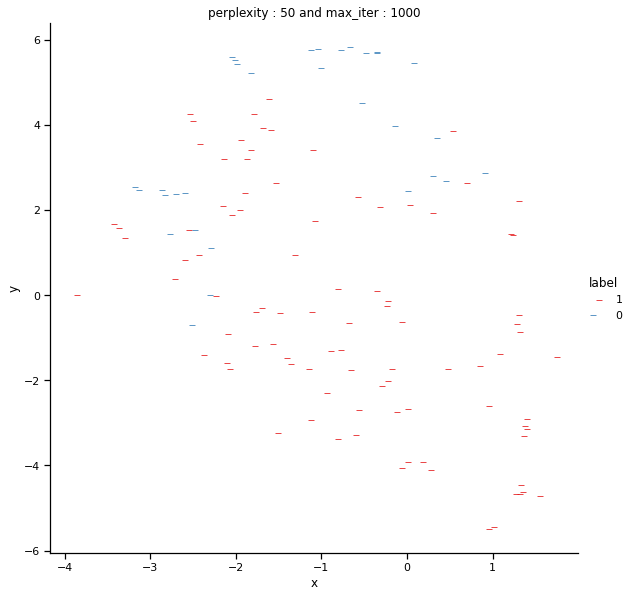

Done


In [37]:
perform_tsne(X = X_pre_tsne,y=y_pre_tsne, perplexities =[2,5,10,20,50])

# Implementing Ensemble Machine Learning Algorithms

### Bagging, AdaBoost and XGBoost

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [38]:
classifiers = [
   
    BaggingClassifier(n_estimators=100, max_samples=.7),
    AdaBoostClassifier( n_estimators= 100),
    XGBClassifier()
]

names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    accuracy_scores.append(accuracy_score(ypred, y_test))
    precision_scores.append(precision_score(ypred, y_test))
    recall_scores.append(recall_score(ypred, y_test))
    f1_scores.append(f1_score(ypred, y_test))
    

score_df = pd.DataFrame({'Model': names, 'Accuracy': accuracy_scores }).set_index('Model')
score_df

[05:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy
Model                       
BaggingClassifier   0.897436
AdaBoostClassifier  0.871795
XGBClassifier       0.948718

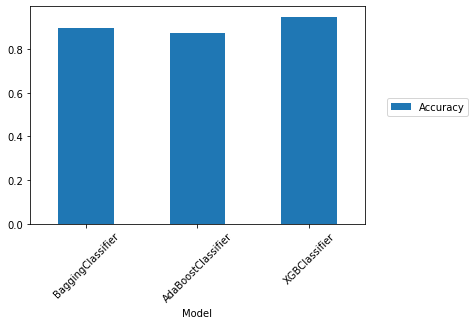

In [37]:
ax = score_df.plot.bar()
ax.set_xticklabels(score_df.index, rotation=45, fontsize=10)
ax.legend(["Accuracy"],
           bbox_to_anchor = (1.05, 0.6))

In [39]:
score_df_1 = pd.DataFrame({'Model': names,'Precision' : precision_scores, 'Recall' : recall_scores, 'F1' : f1_scores}).set_index('Model')
score_df_1

Precision    Recall        F1
Model                                            
BaggingClassifier    0.965517  0.903226  0.933333
AdaBoostClassifier   0.965517  0.875000  0.918033
XGBClassifier        0.965517  0.965517  0.965517

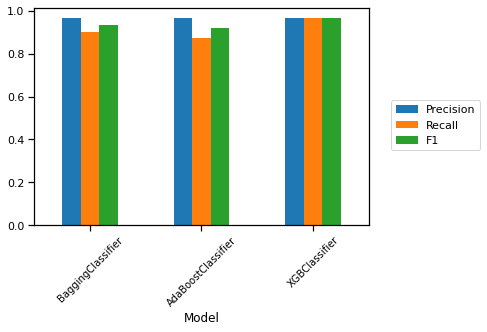

In [65]:
ax = score_df_1.plot.bar()
ax.set_xticklabels(score_df_1.index, rotation=45, fontsize=10)
ax.legend(["Precision","Recall","F1"],
           bbox_to_anchor = (1.05, 0.6))

# Deep Neural Network

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

### Implementing  Neural Network - 1 (without hyperparameter tuning and single hidden layer)

In [126]:
def model_1(n_inputs=22, n_outputs=2, optimizerinput='Adamax'):
    
    model1 = Sequential()
    
    model1.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu')) 
    model1.add(layers.Dense(1, activation='sigmoid'))
    
    model1.compile(loss='binary_crossentropy', optimizer=optimizerinput, metrics=['accuracy'])
    
    return model1

In [127]:
model1=model_1(len(X_train.columns),n_outputs=2, optimizerinput='Adamax');
history = model1.fit(X_train, y_train, verbose=1, epochs=50, batch_size=20, validation_data=(X_val, y_val))

Epoch 1/50
7/7 [==============================] - 1s 29ms/step - loss: 0.7058 - accuracy: 0.2984 - val_loss: 0.6904 - val_accuracy: 0.5312
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.7419 - val_loss: 0.6642 - val_accuracy: 0.8125
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6571 - accuracy: 0.7823 - val_loss: 0.6429 - val_accuracy: 0.7812
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6386 - accuracy: 0.7581 - val_loss: 0.6223 - val_accuracy: 0.7812
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6217 - accuracy: 0.7500 - val_loss: 0.6021 - val_accuracy: 0.7812
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6060 - accuracy: 0.7500 - val_loss: 0.5853 - val_accuracy: 0.7812
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5922 - accuracy: 0.7500 - val_loss: 0.5705 - val_accuracy: 0.7812
Epoch 8/50
7/7 [=================

In [128]:
from numpy import argmax
loss, acc = model1.evaluate(X_test, y_test, verbose=0)

print('Loss =',loss)
print('Accuracy =',acc)

Loss = 0.4212343394756317
Accuracy = 0.7435897588729858


   loss_train  loss_val  diff_in_loss
0    0.705849  0.690378      0.015471
1    0.680412  0.664171      0.016241
2    0.657141  0.642908      0.014232
3    0.638576  0.622306      0.016270
4    0.621659  0.602115      0.019544
5    0.606049  0.585301      0.020747
6    0.592170  0.570473      0.021698
7    0.580815  0.556058      0.024757
8    0.569494  0.544418      0.025077
9    0.559357  0.534627      0.024730


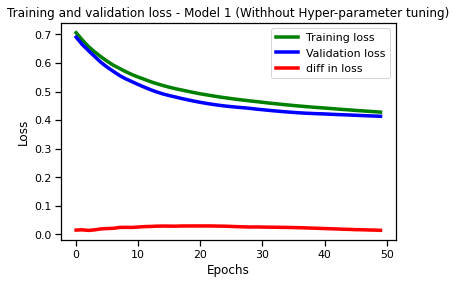

In [129]:
loss = history.history['loss']
val_loss = history.history['val_loss']
diff_in_loss=abs(np.subtract(val_loss,loss));

df = pd.DataFrame({'loss_train':loss, 'loss_val':val_loss, 'diff_in_loss':diff_in_loss})

print(df.head(10))

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')

plt.title('Training and validation loss - Model 1 (Withhout Hyper-parameter tuning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

   accuracy_train  accuracy_val  diff_in_accuracy
0        0.298387       0.53125          0.232863
1        0.741935       0.81250          0.070565
2        0.782258       0.78125          0.001008
3        0.758065       0.78125          0.023185
4        0.750000       0.78125          0.031250
5        0.750000       0.78125          0.031250
6        0.750000       0.78125          0.031250
7        0.750000       0.78125          0.031250
8        0.750000       0.78125          0.031250
9        0.750000       0.78125          0.031250


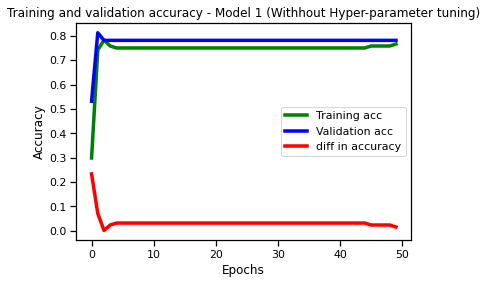

In [130]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
diff_in_accuracy=abs(np.subtract(val_accuracy,accuracy));

df = pd.DataFrame({'accuracy_train':accuracy, 'accuracy_val':val_accuracy, 'diff_in_accuracy':diff_in_accuracy})
print(df.head(10))
epochs = range(len(accuracy))

plt.figure()

plt.plot(epochs, accuracy, 'g', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.plot(epochs, diff_in_accuracy, 'r', label='diff in accuracy')
plt.title('Training and validation accuracy - Model 1 (Withhout Hyper-parameter tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Implementing Neural Network - 2 (with hyperparameter tuning and single hidden layer)¶

In [132]:
def model_2(n_inputs=22, n_outputs=2, optimizerinput='adam'):
    
    model2 = Sequential()
    
    model2.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu')) 
    #model2.add(layers.Dense(4, activation='relu'))
    model2.add(layers.Dense(1, activation='sigmoid'))
    
    model2.compile(loss='binary_crossentropy', optimizer=optimizerinput, metrics=['accuracy'])
    
    return model2

#### Hyperparameter Tuning to Tune Batch Size and Number of Epochs

In [133]:
model2 = KerasClassifier(build_fn=model_2, n_inputs=len(X.columns), n_outputs=2, verbose=1)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100,500]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.7256 - accuracy: 0.2256
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.6256
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.7538
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.7538
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7538
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7538
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.7538
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7538
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7538
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7538
Epoch 11/100
5/5 [===========

#### Hyperparameter Tuning to Tune Optimization Algorithm

In [134]:
model2 = KerasClassifier(build_fn=model_2, n_inputs=len(X.columns), epochs=100, batch_size=40, n_outputs=2, verbose=1)

optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
5/5 [==============================] - 1s 1ms/step - loss: 0.6740 - accuracy: 0.7538
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7538
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.7538
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7538
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7538
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7538
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7538
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7538
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7538
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7538
Epoch 11/100
5/5 [===========

In [135]:
model2=model_2(len(X_train.columns),n_outputs=2, optimizerinput='RMSprop');
history = model2.fit(X_train, y_train, verbose=1, epochs=100, batch_size=40, validation_data=(X_val, y_val))

Epoch 1/100
4/4 [==============================] - 1s 85ms/step - loss: 0.7002 - accuracy: 0.4113 - val_loss: 0.6796 - val_accuracy: 0.6250
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6714 - accuracy: 0.7419 - val_loss: 0.6521 - val_accuracy: 0.7812
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6488 - accuracy: 0.7500 - val_loss: 0.6255 - val_accuracy: 0.7812
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6298 - accuracy: 0.7500 - val_loss: 0.6178 - val_accuracy: 0.7812
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6224 - accuracy: 0.7500 - val_loss: 0.6068 - val_accuracy: 0.7812
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6132 - accuracy: 0.7500 - val_loss: 0.5896 - val_accuracy: 0.7812
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6001 - accuracy: 0.7500 - val_loss: 0.5764 - val_accuracy: 0.7812
Epoch 8/100
4/4 [===

In [136]:
from numpy import argmax
loss, acc = model2.evaluate(X_test, y_test, verbose=0)

print('Loss =',loss)
print('Accuracy =',acc)

Loss = 0.36035722494125366
Accuracy = 0.8205128312110901


In [137]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

   loss_train  loss_val  diff_in_loss
0    0.700198  0.679649      0.020549
1    0.671376  0.652080      0.019296
2    0.648809  0.625540      0.023269
3    0.629794  0.617809      0.011985
4    0.622422  0.606847      0.015575
5    0.613204  0.589603      0.023600
6    0.600108  0.576375      0.023732
7    0.589999  0.562474      0.027525
8    0.578691  0.553847      0.024844
9    0.570674  0.541844      0.028829


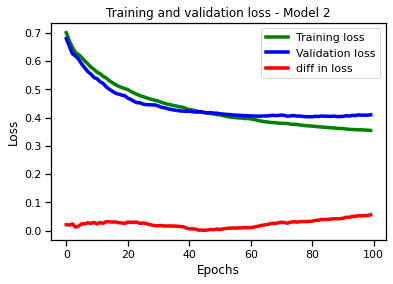

In [138]:
loss = history.history['loss']
val_loss = history.history['val_loss']
diff_in_loss=abs(np.subtract(val_loss,loss));

df = pd.DataFrame({'loss_train':loss, 'loss_val':val_loss, 'diff_in_loss':diff_in_loss})

print(df.head(10))

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')

plt.title('Training and validation loss - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

   accuracy_train  accuracy_val  diff_in_accuracy
0        0.411290       0.62500          0.213710
1        0.741935       0.78125          0.039315
2        0.750000       0.78125          0.031250
3        0.750000       0.78125          0.031250
4        0.750000       0.78125          0.031250
5        0.750000       0.78125          0.031250
6        0.750000       0.78125          0.031250
7        0.750000       0.78125          0.031250
8        0.750000       0.78125          0.031250
9        0.750000       0.78125          0.031250


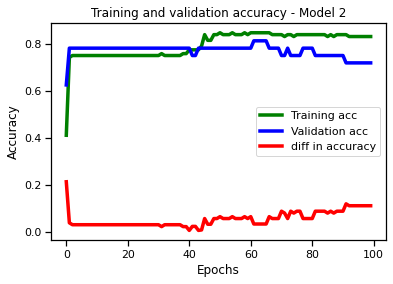

In [139]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
diff_in_accuracy=abs(np.subtract(val_accuracy,accuracy));

df = pd.DataFrame({'accuracy_train':accuracy, 'accuracy_val':val_accuracy, 'diff_in_accuracy':diff_in_accuracy})
print(df.head(10))
epochs = range(len(accuracy))

plt.figure()

plt.plot(epochs, accuracy, 'g', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.plot(epochs, diff_in_accuracy, 'r', label='diff in accuracy')
plt.title('Training and validation accuracy - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Implementing Neural Network - 3 (with more hidden layers)

In [151]:
def model_3(n_inputs=22, n_outputs=2, optimizerinput='adam'):
    
    model3 = Sequential()
    
    model3.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal',activation='relu'))
    
    model3.add(layers.Dense(20, activation='relu'))
    model3.add(layers.Dense(20, activation='relu'))
    model3.add(layers.Dense(16, activation='relu'))
    model3.add(layers.Dense(16, activation='relu'))
    model3.add(layers.Dense(1, activation='sigmoid'))
    
    model3.compile(loss='binary_crossentropy', optimizer=optimizerinput, metrics=['accuracy'])
    
    return model3

#### Hyperparameter Tuning to Tune Batch Size and Number of Epochs

In [152]:
model3 = KerasClassifier(build_fn=model_3, n_inputs=len(X.columns), n_outputs=2, verbose=1)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100,500]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/500
20/20 [==============================] - 1s 1ms/step - loss: 0.6861 - accuracy: 0.7026
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.7538
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.7538
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7538
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8154
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8359
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8308
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8308
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8410
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8410
Epoch 11/

20/20 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.9333
Epoch 84/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.9487
Epoch 85/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.9385
Epoch 86/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1465 - accuracy: 0.9385
Epoch 87/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.9128
Epoch 88/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9231
Epoch 89/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9333
Epoch 90/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9487
Epoch 91/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1164 - accuracy: 0.9487
Epoch 92/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9487
Epoch 93/500


20/20 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 246/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 247/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 248/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 249/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 0.9949
Epoch 250/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 251/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 252/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 253/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 254/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoc

20/20 [==============================] - 0s 1ms/step - loss: 1.6366e-04 - accuracy: 1.0000
Epoch 404/500
20/20 [==============================] - 0s 1ms/step - loss: 1.4664e-04 - accuracy: 1.0000
Epoch 405/500
20/20 [==============================] - 0s 1ms/step - loss: 1.4715e-04 - accuracy: 1.0000
Epoch 406/500
20/20 [==============================] - 0s 1ms/step - loss: 1.3604e-04 - accuracy: 1.0000
Epoch 407/500
20/20 [==============================] - 0s 1ms/step - loss: 1.4671e-04 - accuracy: 1.0000
Epoch 408/500
20/20 [==============================] - 0s 1ms/step - loss: 1.4785e-04 - accuracy: 1.0000
Epoch 409/500
20/20 [==============================] - 0s 1ms/step - loss: 1.8587e-04 - accuracy: 1.0000
Epoch 410/500
20/20 [==============================] - 0s 1ms/step - loss: 1.6070e-04 - accuracy: 1.0000
Epoch 411/500
20/20 [==============================] - 0s 1ms/step - loss: 1.2936e-04 - accuracy: 1.0000
Epoch 412/500
20/20 [==============================] - 0s 1ms/step - 

20/20 [==============================] - 0s 1ms/step - loss: 5.0216e-05 - accuracy: 1.0000
Epoch 482/500
20/20 [==============================] - 0s 1ms/step - loss: 5.1746e-05 - accuracy: 1.0000
Epoch 483/500
20/20 [==============================] - 0s 1ms/step - loss: 4.9925e-05 - accuracy: 1.0000
Epoch 484/500
20/20 [==============================] - 0s 1ms/step - loss: 4.7016e-05 - accuracy: 1.0000
Epoch 485/500
20/20 [==============================] - 0s 1ms/step - loss: 4.6394e-05 - accuracy: 1.0000
Epoch 486/500
20/20 [==============================] - 0s 1ms/step - loss: 4.6010e-05 - accuracy: 1.0000
Epoch 487/500
20/20 [==============================] - 0s 1ms/step - loss: 4.3966e-05 - accuracy: 1.0000
Epoch 488/500
20/20 [==============================] - 0s 1ms/step - loss: 4.4754e-05 - accuracy: 1.0000
Epoch 489/500
20/20 [==============================] - 0s 1ms/step - loss: 4.1760e-05 - accuracy: 1.0000
Epoch 490/500
20/20 [==============================] - 0s 979us/step 

#### Hyperparameter Tuning to Tune Optimization Algorithm

In [153]:
model3 = KerasClassifier(build_fn=model_3, n_inputs=len(X.columns), epochs=500, batch_size=10, n_outputs=2, verbose=1)

optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/500
20/20 [==============================] - 1s 1ms/step - loss: 0.6804 - accuracy: 0.7179
Epoch 2/500
20/20 [==============================] - 0s 927us/step - loss: 0.6512 - accuracy: 0.7538
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.7538
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.7538
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7538
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7538
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7538
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.7538
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.7538
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.7538
Epoch 1

20/20 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.9590
Epoch 164/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9538
Epoch 165/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.9487
Epoch 166/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9385
Epoch 167/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9538
Epoch 168/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9590
Epoch 169/500
20/20 [==============================] - 0s 931us/step - loss: 0.1080 - accuracy: 0.9641
Epoch 170/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.9590
Epoch 171/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.9692
Epoch 172/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9641
Ep

20/20 [==============================] - 0s 983us/step - loss: 0.0555 - accuracy: 0.9846
Epoch 245/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9897
Epoch 246/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9795
Epoch 247/500
20/20 [==============================] - 0s 913us/step - loss: 0.0529 - accuracy: 0.9795
Epoch 248/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9692
Epoch 249/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9795
Epoch 250/500
20/20 [==============================] - 0s 943us/step - loss: 0.0541 - accuracy: 0.9897
Epoch 251/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0487 - accuracy: 0.9846
Epoch 252/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9846
Epoch 253/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.984

Epoch 405/500
20/20 [==============================] - 0s 976us/step - loss: 0.0088 - accuracy: 1.0000
Epoch 406/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 407/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 408/500
20/20 [==============================] - 0s 991us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 409/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 410/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 411/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 412/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 413/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 414/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0063 - acc

In [154]:
model2=model_2(len(X_train.columns),n_outputs=2, optimizerinput='Adamax');
history = model2.fit(X_train, y_train, verbose=1, epochs=500, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/500
13/13 [==============================] - 1s 18ms/step - loss: 0.6705 - accuracy: 0.7419 - val_loss: 0.6264 - val_accuracy: 0.7812
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.7500 - val_loss: 0.5840 - val_accuracy: 0.7812
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.7500 - val_loss: 0.5507 - val_accuracy: 0.7812
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5660 - accuracy: 0.7500 - val_loss: 0.5276 - val_accuracy: 0.7812
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.7500 - val_loss: 0.5102 - val_accuracy: 0.7812
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 0.5354 - accuracy: 0.7500 - val_loss: 0.4970 - val_accuracy: 0.7812
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5245 - accuracy: 0.7500 - val_loss: 0.4847 - val_accuracy: 0.7812
Epoch 8/500


Epoch 59/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8468 - val_loss: 0.3902 - val_accuracy: 0.7812
Epoch 60/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3748 - accuracy: 0.8468 - val_loss: 0.3901 - val_accuracy: 0.7812
Epoch 61/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.8468 - val_loss: 0.3897 - val_accuracy: 0.7812
Epoch 62/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3722 - accuracy: 0.8468 - val_loss: 0.3890 - val_accuracy: 0.7812
Epoch 63/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8468 - val_loss: 0.3892 - val_accuracy: 0.7812
Epoch 64/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.8387 - val_loss: 0.3894 - val_accuracy: 0.7812
Epoch 65/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8387 - val_loss: 0.3891 - val_accuracy: 0.7812
Epoch 

13/13 [==============================] - 0s 4ms/step - loss: 0.3295 - accuracy: 0.8387 - val_loss: 0.3785 - val_accuracy: 0.7188
Epoch 174/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8387 - val_loss: 0.3782 - val_accuracy: 0.7188
Epoch 175/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8387 - val_loss: 0.3782 - val_accuracy: 0.7188
Epoch 176/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.8387 - val_loss: 0.3772 - val_accuracy: 0.7188
Epoch 177/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8387 - val_loss: 0.3755 - val_accuracy: 0.7188
Epoch 178/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8387 - val_loss: 0.3764 - val_accuracy: 0.7188
Epoch 179/500
13/13 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8387 - val_loss: 0.3757 - val_accuracy: 0.7188
Epoch 180/500

13/13 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8468 - val_loss: 0.3580 - val_accuracy: 0.7500
Epoch 288/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3092 - accuracy: 0.8468 - val_loss: 0.3565 - val_accuracy: 0.7500
Epoch 289/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3092 - accuracy: 0.8468 - val_loss: 0.3558 - val_accuracy: 0.7500
Epoch 290/500
13/13 [==============================] - 0s 5ms/step - loss: 0.3091 - accuracy: 0.8468 - val_loss: 0.3558 - val_accuracy: 0.7500
Epoch 291/500
13/13 [==============================] - 0s 5ms/step - loss: 0.3089 - accuracy: 0.8468 - val_loss: 0.3557 - val_accuracy: 0.7500
Epoch 292/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3091 - accuracy: 0.8468 - val_loss: 0.3540 - val_accuracy: 0.7500
Epoch 293/500
13/13 [==============================] - 0s 5ms/step - loss: 0.3083 - accuracy: 0.8468 - val_loss: 0.3555 - val_accuracy: 0.7500
Epoch 294/500

13/13 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.8548 - val_loss: 0.3419 - val_accuracy: 0.7812
Epoch 402/500
13/13 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.8548 - val_loss: 0.3398 - val_accuracy: 0.7812
Epoch 403/500
13/13 [==============================] - 0s 4ms/step - loss: 0.2930 - accuracy: 0.8548 - val_loss: 0.3405 - val_accuracy: 0.7812
Epoch 404/500
13/13 [==============================] - 0s 4ms/step - loss: 0.2929 - accuracy: 0.8548 - val_loss: 0.3401 - val_accuracy: 0.7812
Epoch 405/500
13/13 [==============================] - 0s 4ms/step - loss: 0.2925 - accuracy: 0.8548 - val_loss: 0.3418 - val_accuracy: 0.7812
Epoch 406/500
13/13 [==============================] - 0s 4ms/step - loss: 0.2927 - accuracy: 0.8548 - val_loss: 0.3430 - val_accuracy: 0.7812
Epoch 407/500
13/13 [==============================] - 0s 4ms/step - loss: 0.2926 - accuracy: 0.8548 - val_loss: 0.3437 - val_accuracy: 0.7812
Epoch 408/500

In [155]:
from numpy import argmax
loss, acc = model2.evaluate(X_test, y_test, verbose=0)

print('Loss =',loss)
print('Accuracy =',acc)

Loss = 0.3213766813278198
Accuracy = 0.8974359035491943


In [156]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

   loss_train  loss_val  diff_in_loss
0    0.670504  0.626366      0.044139
1    0.625283  0.583989      0.041295
2    0.589386  0.550664      0.038722
3    0.565976  0.527621      0.038355
4    0.548744  0.510200      0.038544
5    0.535425  0.497017      0.038408
6    0.524500  0.484726      0.039774
7    0.514962  0.475442      0.039520
8    0.507352  0.467271      0.040081
9    0.499676  0.460984      0.038692


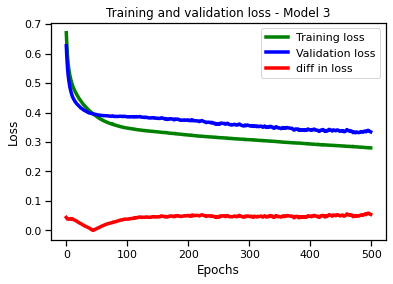

In [157]:
loss = history.history['loss']
val_loss = history.history['val_loss']
diff_in_loss=abs(np.subtract(val_loss,loss));

df = pd.DataFrame({'loss_train':loss, 'loss_val':val_loss, 'diff_in_loss':diff_in_loss})

print(df.head(10))

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')

plt.title('Training and validation loss - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

   accuracy_train  accuracy_val  diff_in_accuracy
0        0.741935       0.78125          0.039315
1        0.750000       0.78125          0.031250
2        0.750000       0.78125          0.031250
3        0.750000       0.78125          0.031250
4        0.750000       0.78125          0.031250
5        0.750000       0.78125          0.031250
6        0.750000       0.78125          0.031250
7        0.750000       0.78125          0.031250
8        0.750000       0.78125          0.031250
9        0.750000       0.78125          0.031250


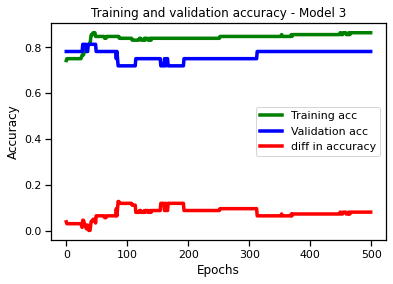

In [158]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
diff_in_accuracy=abs(np.subtract(val_accuracy,accuracy));

df = pd.DataFrame({'accuracy_train':accuracy, 'accuracy_val':val_accuracy, 'diff_in_accuracy':diff_in_accuracy})
print(df.head(10))
epochs = range(len(accuracy))

plt.figure()

plt.plot(epochs, accuracy, 'g', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.plot(epochs, diff_in_accuracy, 'r', label='diff in accuracy')
plt.title('Training and validation accuracy - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Predicting only XGBoost model as it has the highest accuracy

In [161]:
clf = XGBClassifier()
XGB_model = clf.fit(X_train, y_train)
XGB_model = XGB_model.predict(X_test)

print(y_test.head(10))
print("The predictions are")
print(XGB_model)

[06:42:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
132    1
16     1
18     1
51     0
164    1
145    1
11     1
27     1
176    0
118    1
Name: status, dtype: int64
The predictions are
[1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 0]
